<a href="https://www.kaggle.com/code/mdromzanalom/pneumonia-detection-dl?scriptVersionId=158149248" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Step 1: Preprocess the dataset
def load_dataset(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (256, 256))  # Resize the images to a consistent size
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

x_train, y_train = load_dataset(train_dir)
x_test, y_test = load_dataset(test_dir)
x_val, y_val = load_dataset(val_dir)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Convert string labels to numeric representations
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
model_R = Sequential()
model_R.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model_R.add(MaxPooling2D((2, 2)))
model_R.add(Dropout(0.25))  # Add dropout regularization

model_R.add(Conv2D(64, (3, 3), activation='relu'))
model_R.add(MaxPooling2D((2, 2)))
model_R.add(Dropout(0.25))  # Add dropout regularization

model_R.add(Flatten())
model_R.add(Dense(64, activation='relu'))
model_R.add(Dropout(0.5))  # Add dropout regularization

model_R.add(Dense(1, activation='sigmoid'))

model_R.summary()

# Step 3: Train the model
model_R.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Learning rate scheduler
def lr_scheduler(epoch):
    initial_lr = 0.001
    decay_factor = 0.1
    decay_epochs = 5
    lr = initial_lr * (decay_factor ** (epoch // decay_epochs))
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

history_R = model_R.fit(datagen.flow(x_train, y_train, batch_size=32),
                      steps_per_epoch=len(x_train) // 32,
                      epochs=10,
                      validation_data=(x_val, y_val),
                      callbacks=[lr_callback])

# Step 4: Evaluate on test set
test_loss, test_accuracy = model_R.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

2024-01-08 10:27:47.458686: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


130/130 [==============================] - 64s 443ms/step - loss: 0.9574 - accuracy: 0.7568 - val_loss: 0.5062 - val_accuracy: 0.7653 - lr: 0.0010
Epoch 2/10
130/130 [==============================] - 56s 430ms/step - loss: 0.3753 - accuracy: 0.8215 - val_loss: 0.3507 - val_accuracy: 0.8812 - lr: 0.0010
Epoch 3/10
130/130 [==============================] - 56s 428ms/step - loss: 0.3428 - accuracy: 0.8415 - val_loss: 0.2536 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 4/10
130/130 [==============================] - 56s 432ms/step - loss: 0.3356 - accuracy: 0.8444 - val_loss: 0.2631 - val_accuracy: 0.8908 - lr: 0.0010
Epoch 5/10
130/130 [==============================] - 56s 431ms/step - loss: 0.3213 - accuracy: 0.8572 - val_loss: 0.2547 - val_accuracy: 0.8937 - lr: 0.0010
Epoch 6/10
130/130 [==============================] - 56s 427ms/step - loss: 0.3009 - accuracy: 0.8585 - val_loss: 0.2350 - val_accuracy: 0.9013 - lr: 1.0000e-04
Epoch 7/10
130/130 [==============================] - 57s 4

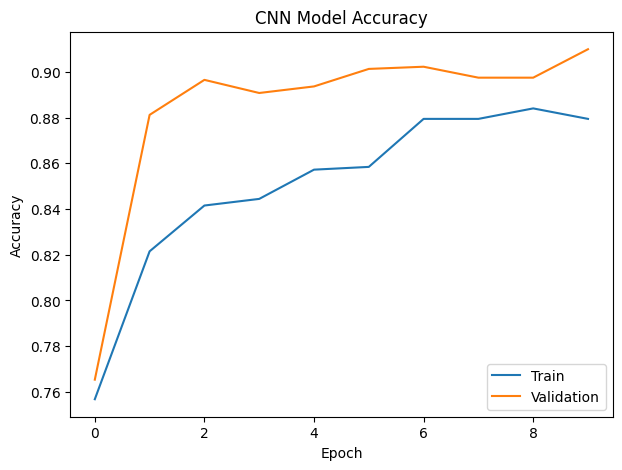

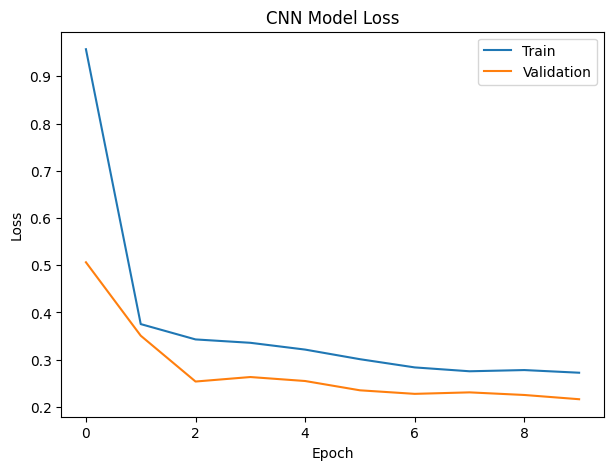

In [2]:
import matplotlib.pyplot as plt

# Plot accuracy versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history_R.history['accuracy'])
plt.plot(history_R.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
beingsaved.savefig('CNN_Accuracy.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Plot loss versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history_R.history['loss'])
plt.plot(history_R.history['val_loss'])
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
beingsaved.savefig('CNN_Loss.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

20/20 [==============================] - 0s 19ms/step
Confusion Matrix:
[[164  70]
 [ 22 368]]
F1 Score: 0.8888888888888888


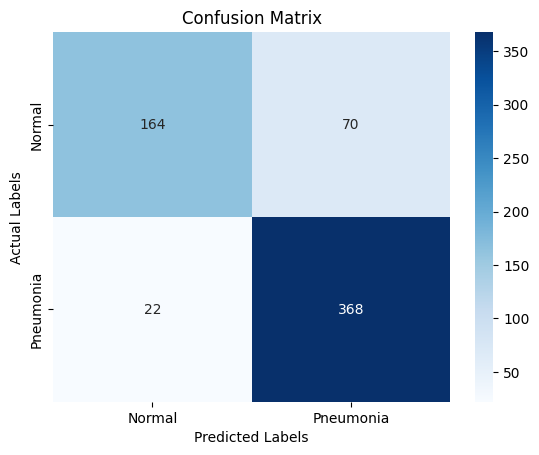

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Step 4: Evaluate on test set
y_pred = model_R.predict(x_test)
y_pred = np.round(y_pred).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])

# Set the axis labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")

# Display the confusion matrix
plt.show()

1/1 [==============================] - 0s 176ms/step


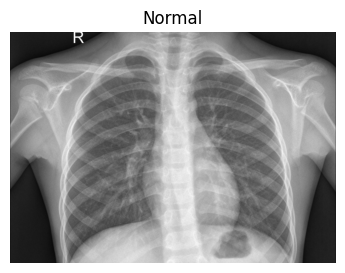

Prediction Class: Normal


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Provide the path to the image you want to test
image_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg'

# Function to preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype('float32') / 255.0
    return np.expand_dims(image, axis=0)

# Function to make predictions on the input image
def predict_pneumonia(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model_R.predict(preprocessed_image)
    if prediction[0] < 0.5:
        return 'Normal'
    else:
        return 'Pneumonia'

result = predict_pneumonia(image_path)

# Load the image
image = cv2.imread(image_path)

# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the grayscale image
image_gray_normalized = image_gray / 255.0

# Check if pneumonia is detected
if result == 'Pneumonia':
    # Create a colormap ranging from blue to red (jet colormap)
    cmap = cm.get_cmap('jet')

    # Apply the colormap to the normalized grayscale image
    image_pneumonia = cmap(image_gray_normalized)

    # Display the pneumonia image
    plt.figure(figsize=(5, 3))
    plt.imshow(image_pneumonia)
else:
    # Display the original image
    plt.figure(figsize=(5, 3))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.title(result)
plt.axis('off')
plt.show()

# Make a prediction
print('Prediction Class:', result)

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

data_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray'

# Step 1: Preprocess the dataset
def load_dataset(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))  # Resize the images to a consistent size
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

x_train, y_train = load_dataset(train_dir)
x_test, y_test = load_dataset(test_dir)
x_val, y_val = load_dataset(val_dir)

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0

# Convert string labels to numeric representations
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_val = label_encoder.transform(y_val)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 2: Build the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

# Step 3: Train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

# Learning rate scheduler
def lr_scheduler(epoch):
    initial_lr = 0.001
    decay_factor = 0.1
    decay_epochs = 5
    lr = initial_lr * (decay_factor ** (epoch // decay_epochs))
    return lr

lr_callback = LearningRateScheduler(lr_scheduler)

history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) // 32,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_callback])

# Step 4: Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23718913 (90.48 MB)
Trainable params: 23665793 (90.28 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________
Epoch 1/1

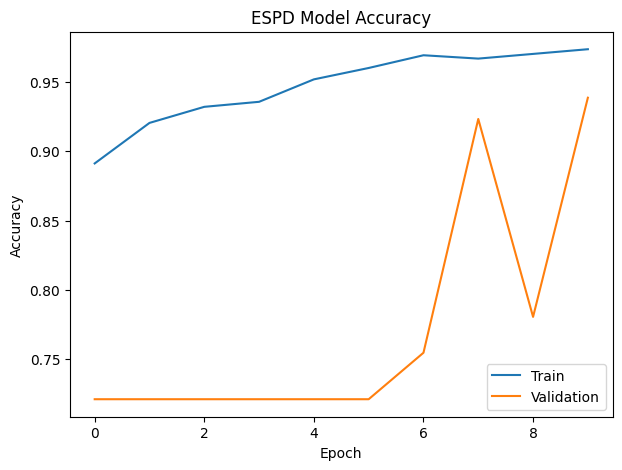

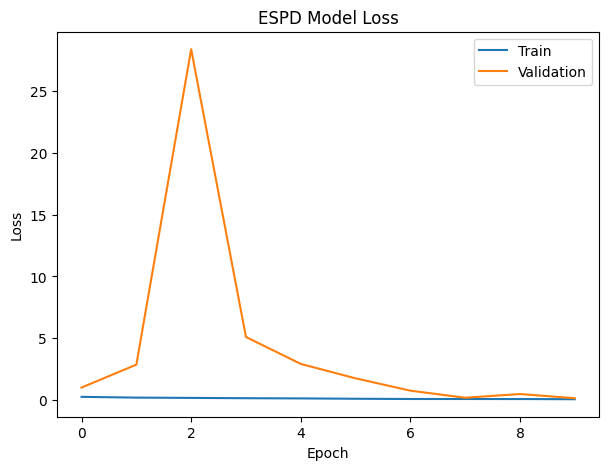

In [6]:
import matplotlib.pyplot as plt

# Plot accuracy versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ESPD Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
beingsaved.savefig('Accuracy.png', format='png', dpi=600, bbox_inches="tight")
plt.show()

# Plot loss versus epoch
beingsaved = plt.figure(figsize=(7, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ESPD Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
beingsaved.savefig('Loss.png', format='png', dpi=600, bbox_inches="tight")
plt.show()